In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn import datasets

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# from tensorflow.python.framework import ops
# ops.reset_default_graph()

sess = tf.Session()

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
data_size = 25
data_1d = np.random.normal(size=data_size)
x_input_1d = tf.placeholder(dtype=tf.float32, shape=[data_size])

Text(0.5, 1.0, 'data_1d')

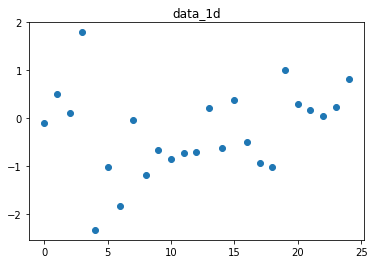

In [3]:
x = np.arange(data_size)
plt.plot(x, data_1d, 'o', label='data_1d')
plt.title('data_1d')

In [13]:
x2_input_1d = tf.random_normal(shape=[25], dtype=tf.float32)
x2 = sess.run(x2_input_1d)
x2

array([-0.5399476 , -1.7671343 , -0.08829788,  1.615144  , -1.6396753 ,
       -1.5909373 , -0.8974811 ,  0.80418104,  1.5206083 , -2.4308922 ,
        1.2517487 , -1.3634782 ,  1.2056679 , -0.7597108 ,  0.01941925,
       -0.22390294, -0.7231589 ,  1.011014  , -0.56068814, -0.00923507,
        0.46133685, -1.904366  , -2.198679  ,  0.02527835,  1.234509  ],
      dtype=float32)

Text(0.5, 1.0, 'x2_input_1d')

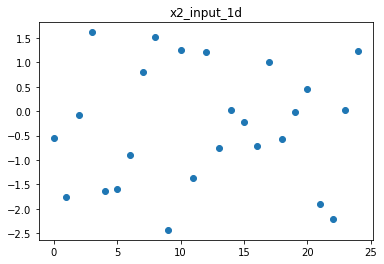

In [14]:
plt.plot(x, x2, 'o', label='x2_input_1d')
plt.title('x2_input_1d')

In [20]:
def conv_layer_1d(input_1d, my_filter):
    
    # make 1d input into 4d
    input_2d = tf.expand_dims(input_1d, 0)
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    
    # perform convolution
    convolution_output = tf.nn.conv2d(input_4d, 
                                      filter=my_filter,
                                      strides=[1,1,1,1], 
                                      padding='VALID')
    # now drop extra dimensions
    conv_output_1d = tf.squeeze(convolution_output)
    
    return conv_output_1d

In [21]:
my_filter = tf.Variable(tf.random_normal(shape=[1,5,1,1]))
my_convolution_output = conv_layer_1d(x_input_1d, my_filter)

In [22]:
def activation(input_1d):
    return (tf.nn.relu(input_1d))

In [23]:
my_activation_output = activation(my_convolution_output)

In [24]:
def max_pool(input_1d, width):
    
    # first we make the 1d input into 4d
    input_2d = tf.expand_dims(input_1d, 0)
    input_3d = tf.expand_dims(input_2d, 0)
    input_4d = tf.expand_dims(input_3d, 3)
    
    # perform the max pool operation
    pool_output = tf.nn.max_pool(input_4d,
                                 ksize=[1,1,width,1],
                                 strides=[1,1,1,1],
                                 padding='VALID')
    pool_output_1d = tf.squeeze(pool_output)
    
    return pool_output_1d

In [25]:
my_maxpool_output = max_pool(my_activation_output, width=5)

In [36]:
def fully_connected(input_layer, num_outputs):
    
    # create weights
    weight_shape = tf.squeeze(tf.stack([tf.shape(input_layer), [num_outputs]]))
    weight = tf.random_normal(weight_shape, stddev=0.1)
    bias = tf.random_normal(shape=[num_outputs])
    
    # make input into 2d
    input_layer_2d = tf.expand_dims(input_layer, 0)
    
    # perform fully connected operations
    # (W * X) + b
    full_output = tf.add(tf.matmul(input_layer_2d, weight), bias)
    
    # drop extra dimensions
    full_output_1d = tf.squeeze(full_output)
    
    return (full_output_1d)

In [37]:
my_full_output = fully_connected(my_maxpool_output, 5)

In [38]:
init = tf.global_variables_initializer()
sess.run(init)

In [39]:
feed_dict = {x_input_1d: data_1d}

# convolution output
print('Input = array of length 25')
print('Convolution w/filter, length = 5, strides size = 1, results in an array of length 21:')
print(sess.run(my_convolution_output, feed_dict=feed_dict))

Input = array of length 25
Convolution w/filter, length = 5, strides size = 1, results in an array of length 21:
[-0.23309499 -2.6002147  -1.0782174  -0.20166099  1.7137433   2.0753574
 -1.381767   -2.281887    0.8559005   0.11092436  0.25693482 -0.22985514
 -0.26638353  0.2778939  -0.6787828  -0.5309956   0.40515155  2.4976091
  0.22263828 -1.1129835  -0.53413296]


In [40]:
# activation output
print('Input = the above array of length 21')
print('ReLU element wise returns the array of length 21:')
print(sess.run(my_activation_output, feed_dict=feed_dict))

Input = the above array of length 21
ReLU element wise returns the array of length 21:
[0.         0.         0.         0.         1.7137433  2.0753574
 0.         0.         0.8559005  0.11092436 0.25693482 0.
 0.         0.2778939  0.         0.         0.40515155 2.4976091
 0.22263828 0.         0.        ]


In [41]:
# maxpool output
print('Input = the above array of length 21')
print('MaxPool, window length = 5, stride size = 1, retults in the array of length 17:')
print(sess.run(my_maxpool_output, feed_dict=feed_dict))

Input = the above array of length 21
MaxPool, window length = 5, stride size = 1, retults in the array of length 17:
[1.7137433  2.0753574  2.0753574  2.0753574  2.0753574  2.0753574
 0.8559005  0.8559005  0.8559005  0.2778939  0.2778939  0.2778939
 0.40515155 2.4976091  2.4976091  2.4976091  2.4976091 ]


In [42]:
# fully contected output
print('Input = the above array of length 17')
print('Fully connected layer on all four rows with five outputs:')
print(sess.run(my_full_output, feed_dict=feed_dict))

Input = the above array of length 17
Fully connected layer on all four rows with five outputs:
[1.2955474  0.2154069  0.07551128 1.0646985  0.3701983 ]
